In [1]:
from scprint import scPrint
from scdataloader import Preprocessor

from bengrn import BenGRN, get_sroy_gt, FILEDIR
import scanpy as sc

from anndata.utils import make_index_unique
from bengrn import compute_genie3, get_GT_db
from grnndata import utils as grnutils
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2 

import sys
import os

sys.path.insert(0, "../")
from scgpt_helper import prepare_model, prepare_dataset, generate_embedding, generate_grn
import scgpt as scg
from scgpt.tasks import GeneEmbedding
from scgpt.tokenizer.gene_tokenizer import GeneVocab
from scgpt.utils import set_seed
from scgpt.tokenizer import tokenize_and_pad_batch
import torch

os.environ["KMP_WARNINGS"] = "off"

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


2024-06-27 18:03:12,120:INFO - PyTorch version 2.0.0 available.


2024-06-27 18:03:12,122:INFO - JAX version 0.4.28 available.


In [2]:
genes = torch.load('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/vbd8bavn/checkpoints/epoch=17-step=90000.ckpt')['hyper_parameters']['genes']
#../../scPRINT/data/temp/vbd8bavn/epoch=17-step=90000.ckpt
preprocessor = Preprocessor(is_symbol=True, force_preprocess=True, skip_validate=True,
                            do_postp=False, min_valid_genes_id=5000, min_dataset_size=64)
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
model, vocab = prepare_model(model_dir="../save/scGPT_human")

Resume model from ../save/scGPT_human/best_model.pt, the model args will override the config ../save/scGPT_human/args.json.


# han / full


In [4]:
metrics = {}

In [5]:
preadata = get_sroy_gt(get="han", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

Dropping layers:  KeysView(Layers with keys: )
checking raw counts


removed 0 non primary cells, 5520 renamining


filtered out 0 cells, 5520 renamining


Removed 0 genes.


startin QC


Seeing 151 outliers (2.74% of total dataset):
done


(GRnnData object with n_obs × n_vars = 5520 × 7465
     obs: 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 8463 elements,
 31)

scGPT - INFO - Filtering genes by counts ...


scGPT - INFO - Normalizing total counts ...


scGPT - INFO - Log1p transforming ...


scGPT - INFO - Binning data ...


  0%|          | 0/103 [00:00<?, ?it/s]

  1%|          | 1/103 [00:01<02:12,  1.30s/it]

  2%|▏         | 2/103 [00:02<01:38,  1.03it/s]

  3%|▎         | 3/103 [00:02<01:26,  1.15it/s]

  4%|▍         | 4/103 [00:03<01:20,  1.22it/s]

  5%|▍         | 5/103 [00:04<01:17,  1.27it/s]

  6%|▌         | 6/103 [00:05<01:15,  1.29it/s]

  7%|▋         | 7/103 [00:05<01:13,  1.31it/s]

  8%|▊         | 8/103 [00:06<01:12,  1.32it/s]

  9%|▊         | 9/103 [00:07<01:10,  1.33it/s]

 10%|▉         | 10/103 [00:07<01:09,  1.33it/s]

 11%|█         | 11/103 [00:08<01:08,  1.34it/s]

 12%|█▏        | 12/103 [00:09<01:07,  1.34it/s]

 13%|█▎        | 13/103 [00:10<01:06,  1.34it/s]

 14%|█▎        | 14/103 [00:10<01:06,  1.35it/s]

 15%|█▍        | 15/103 [00:11<01:05,  1.35it/s]

 16%|█▌        | 16/103 [00:12<01:04,  1.35it/s]

 17%|█▋        | 17/103 [00:13<01:03,  1.35it/s]

 17%|█▋        | 18/103 [00:13<01:03,  1.35it/s]

 18%|█▊        | 19/103 [00:14<01:02,  1.35it/s]

 19%|█▉        | 20/103 [00:15<01:01,  1.35it/s]

 20%|██        | 21/103 [00:16<01:00,  1.35it/s]

 21%|██▏       | 22/103 [00:16<01:00,  1.35it/s]

 22%|██▏       | 23/103 [00:17<00:59,  1.35it/s]

 23%|██▎       | 24/103 [00:18<01:00,  1.31it/s]

 24%|██▍       | 25/103 [00:19<01:00,  1.29it/s]

 25%|██▌       | 26/103 [00:20<01:00,  1.28it/s]

 26%|██▌       | 27/103 [00:20<00:59,  1.27it/s]

 27%|██▋       | 28/103 [00:21<00:59,  1.26it/s]

 28%|██▊       | 29/103 [00:22<00:58,  1.26it/s]

 29%|██▉       | 30/103 [00:23<00:58,  1.25it/s]

 30%|███       | 31/103 [00:24<00:57,  1.25it/s]

 31%|███       | 32/103 [00:24<00:56,  1.25it/s]

 32%|███▏      | 33/103 [00:25<00:55,  1.25it/s]

 33%|███▎      | 34/103 [00:26<00:55,  1.25it/s]

 34%|███▍      | 35/103 [00:27<00:54,  1.25it/s]

 35%|███▍      | 36/103 [00:28<00:53,  1.25it/s]

 36%|███▌      | 37/103 [00:28<00:52,  1.25it/s]

 37%|███▋      | 38/103 [00:29<00:52,  1.24it/s]

 38%|███▊      | 39/103 [00:30<00:51,  1.24it/s]

 39%|███▉      | 40/103 [00:31<00:51,  1.23it/s]

 40%|███▉      | 41/103 [00:32<00:50,  1.23it/s]

 41%|████      | 42/103 [00:32<00:49,  1.23it/s]

 42%|████▏     | 43/103 [00:33<00:48,  1.23it/s]

 43%|████▎     | 44/103 [00:34<00:48,  1.23it/s]

 44%|████▎     | 45/103 [00:35<00:47,  1.22it/s]

 45%|████▍     | 46/103 [00:36<00:46,  1.22it/s]

 46%|████▌     | 47/103 [00:37<00:45,  1.22it/s]

 47%|████▋     | 48/103 [00:37<00:44,  1.22it/s]

 48%|████▊     | 49/103 [00:38<00:44,  1.22it/s]

 49%|████▊     | 50/103 [00:39<00:43,  1.22it/s]

 50%|████▉     | 51/103 [00:40<00:42,  1.22it/s]

 50%|█████     | 52/103 [00:41<00:41,  1.22it/s]

 51%|█████▏    | 53/103 [00:41<00:40,  1.22it/s]

 52%|█████▏    | 54/103 [00:42<00:39,  1.23it/s]

 53%|█████▎    | 55/103 [00:43<00:38,  1.24it/s]

 54%|█████▍    | 56/103 [00:44<00:37,  1.24it/s]

 55%|█████▌    | 57/103 [00:45<00:36,  1.24it/s]

 56%|█████▋    | 58/103 [00:45<00:36,  1.25it/s]

 57%|█████▋    | 59/103 [00:46<00:35,  1.25it/s]

 58%|█████▊    | 60/103 [00:47<00:34,  1.25it/s]

 59%|█████▉    | 61/103 [00:48<00:33,  1.25it/s]

 60%|██████    | 62/103 [00:49<00:32,  1.25it/s]

 61%|██████    | 63/103 [00:49<00:32,  1.25it/s]

 62%|██████▏   | 64/103 [00:50<00:31,  1.25it/s]

 63%|██████▎   | 65/103 [00:51<00:30,  1.25it/s]

 64%|██████▍   | 66/103 [00:52<00:29,  1.25it/s]

 65%|██████▌   | 67/103 [00:53<00:28,  1.25it/s]

 66%|██████▌   | 68/103 [00:53<00:28,  1.25it/s]

 67%|██████▋   | 69/103 [00:54<00:27,  1.24it/s]

 68%|██████▊   | 70/103 [00:55<00:26,  1.25it/s]

 69%|██████▉   | 71/103 [00:56<00:25,  1.24it/s]

 70%|██████▉   | 72/103 [00:57<00:24,  1.24it/s]

 71%|███████   | 73/103 [00:57<00:24,  1.24it/s]

 72%|███████▏  | 74/103 [00:58<00:23,  1.24it/s]

 73%|███████▎  | 75/103 [00:59<00:22,  1.25it/s]

 74%|███████▍  | 76/103 [01:00<00:21,  1.25it/s]

 75%|███████▍  | 77/103 [01:01<00:20,  1.25it/s]

 76%|███████▌  | 78/103 [01:01<00:20,  1.25it/s]

 77%|███████▋  | 79/103 [01:02<00:19,  1.25it/s]

 78%|███████▊  | 80/103 [01:03<00:18,  1.25it/s]

 79%|███████▊  | 81/103 [01:04<00:17,  1.25it/s]

 80%|███████▉  | 82/103 [01:05<00:16,  1.25it/s]

 81%|████████  | 83/103 [01:05<00:15,  1.25it/s]

 82%|████████▏ | 84/103 [01:06<00:15,  1.25it/s]

 83%|████████▎ | 85/103 [01:07<00:14,  1.25it/s]

 83%|████████▎ | 86/103 [01:08<00:13,  1.25it/s]

 84%|████████▍ | 87/103 [01:09<00:12,  1.25it/s]

 85%|████████▌ | 88/103 [01:09<00:11,  1.25it/s]

 86%|████████▋ | 89/103 [01:10<00:11,  1.25it/s]

 87%|████████▋ | 90/103 [01:11<00:10,  1.25it/s]

 88%|████████▊ | 91/103 [01:12<00:09,  1.25it/s]

 89%|████████▉ | 92/103 [01:13<00:08,  1.25it/s]

 90%|█████████ | 93/103 [01:13<00:07,  1.25it/s]

 91%|█████████▏| 94/103 [01:14<00:07,  1.25it/s]

 92%|█████████▏| 95/103 [01:15<00:06,  1.25it/s]

 93%|█████████▎| 96/103 [01:16<00:05,  1.25it/s]

 94%|█████████▍| 97/103 [01:17<00:04,  1.25it/s]

 95%|█████████▌| 98/103 [01:17<00:03,  1.28it/s]

 96%|█████████▌| 99/103 [01:18<00:03,  1.29it/s]

 97%|█████████▋| 100/103 [01:19<00:02,  1.29it/s]

 98%|█████████▊| 101/103 [01:20<00:01,  1.29it/s]

 99%|█████████▉| 102/103 [01:21<00:00,  1.28it/s]

100%|██████████| 103/103 [01:21<00:00,  1.53it/s]

100%|██████████| 103/103 [01:21<00:00,  1.27it/s]

precision:  0.02740789449650209 
recall:  1.0 
random precision: 0.02741340251388483


  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 3711.23it/s]

Area Under Precision-Recall Curve (AUPRC):  0.021813575802196367
EPR: 0.38773864164747424


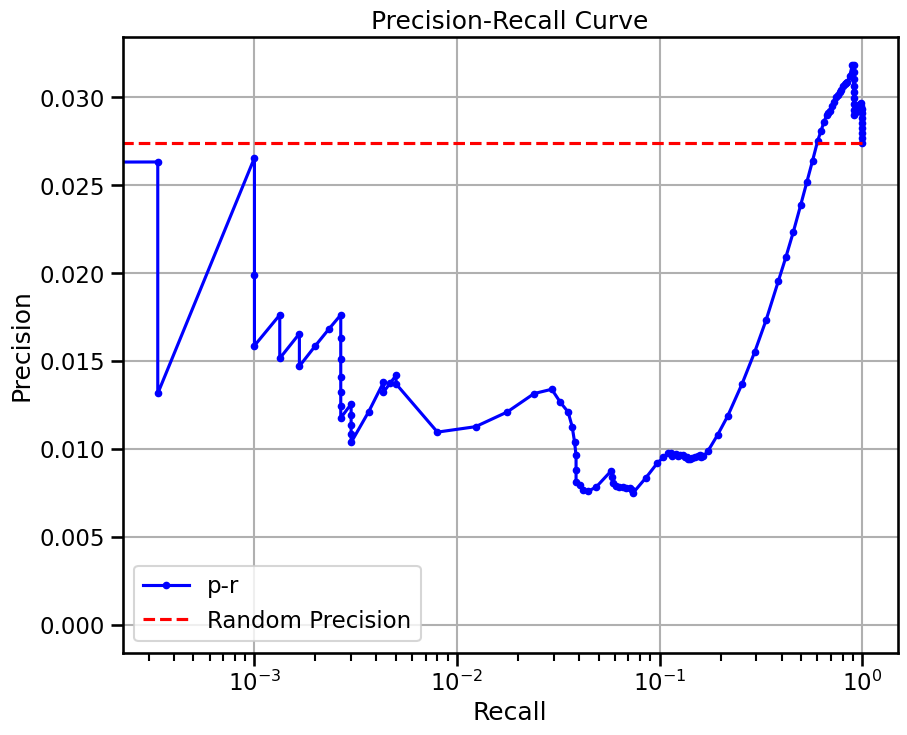

In [6]:
sc.pp.highly_variable_genes(
    adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
adata.var['ensembl_id'] = adata.var.index
subadata = adata[:MAXCELLS, adata.var.index.isin(
    genes) & adata.var.highly_variable]
subadata.var = subadata.var.set_index("symbol")
grn = generate_grn(model, vocab, subadata, batch_size = 10, num_attn_layers = 11)
grn.var.index.name=""
grn.var['symbol'] = grn.var.index
grn.varp['GRN'] = grn.varp['GRN'].T
metrics['scGPT_han'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.2536840196611731 
recall:  1.0 
random precision: 0.2537350011763783


  0%|          | 0/128 [00:00<?, ?it/s]

 48%|████▊     | 62/128 [00:00<00:00, 615.11it/s]

 97%|█████████▋| 124/128 [00:00<00:00, 615.82it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 613.18it/s]

Area Under Precision-Recall Curve (AUPRC):  0.2443648512761225
EPR: 1.2505614440961927


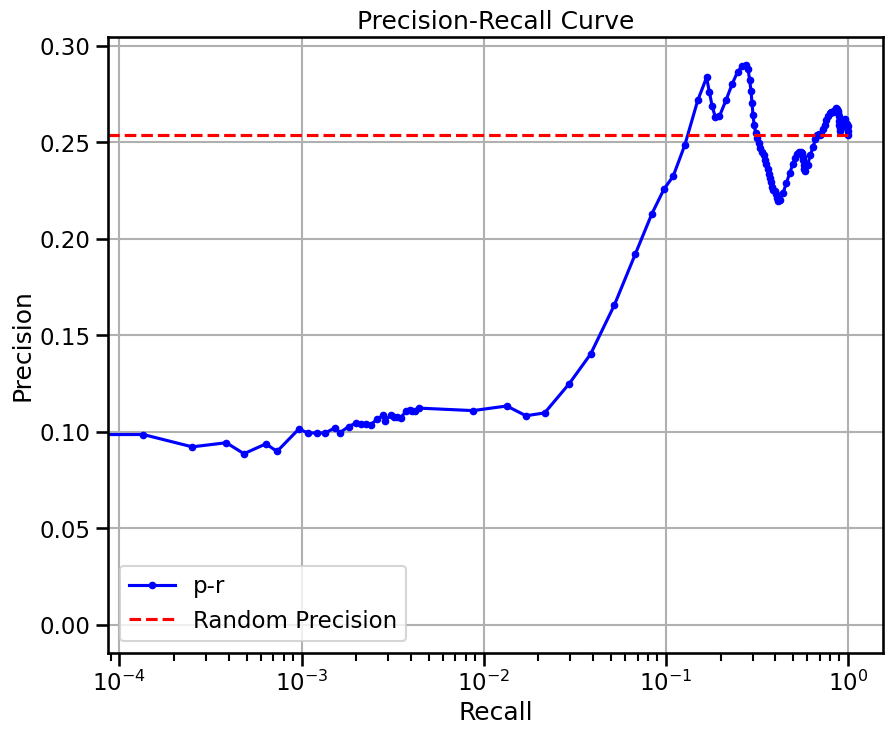

In [7]:
preadata = get_sroy_gt(get="han", species="human", gt="chip")
metrics['scGPT_han_chip'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.07659519504004134 
recall:  1.0 
random precision: 0.07661058796508957


  0%|          | 0/128 [00:00<?, ?it/s]

 37%|███▋      | 47/128 [00:00<00:00, 463.66it/s]

 73%|███████▎  | 94/128 [00:00<00:00, 464.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 464.05it/s]

Area Under Precision-Recall Curve (AUPRC):  0.06264502327552278
EPR: 0.20287663002542908


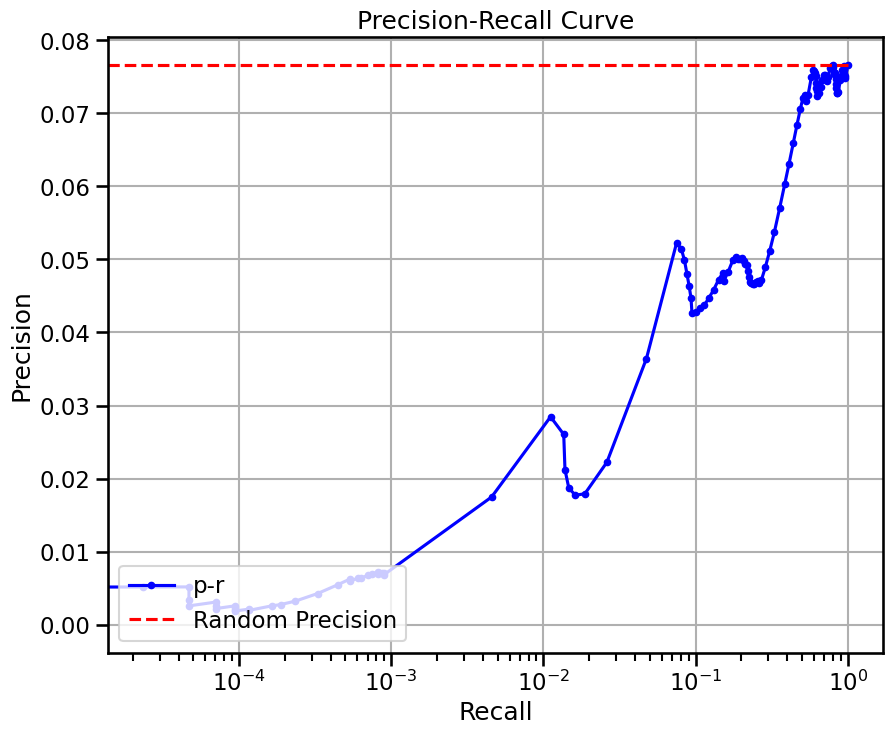

In [8]:
preadata = get_sroy_gt(get="han", species="human", gt="ko")
metrics['scGPT_han_ko'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

## trial with my own ESC

In [9]:
preadata = get_sroy_gt(get="mine", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

Dropping layers:  KeysView(Layers with keys: )
checking raw counts


Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 115 renamining


filtered out 0 cells, 115 renamining
Removed 0 genes.


startin QC
Seeing 105 outliers (91.30% of total dataset):


done


(GRnnData object with n_obs × n_vars = 115 × 28466
     obs: 'organism_ontology_term_id'
     var: 'ensembl_id'
     varp: 'GRN'
     with a grn of 11563 elements,
 35)

scGPT - INFO - Filtering genes by counts ...


scGPT - INFO - Normalizing total counts ...


scGPT - INFO - Log1p transforming ...


scGPT - INFO - Binning data ...


  0%|          | 0/12 [00:00<?, ?it/s]

  8%|▊         | 1/12 [00:00<00:06,  1.82it/s]

 17%|█▋        | 2/12 [00:01<00:05,  1.86it/s]

 25%|██▌       | 3/12 [00:01<00:04,  1.87it/s]

 33%|███▎      | 4/12 [00:02<00:04,  1.88it/s]

 42%|████▏     | 5/12 [00:02<00:03,  1.88it/s]

 50%|█████     | 6/12 [00:03<00:03,  1.88it/s]

 58%|█████▊    | 7/12 [00:03<00:02,  1.88it/s]

 67%|██████▋   | 8/12 [00:04<00:02,  1.88it/s]

 75%|███████▌  | 9/12 [00:04<00:01,  1.88it/s]

 83%|████████▎ | 10/12 [00:05<00:01,  1.88it/s]

 92%|█████████▏| 11/12 [00:05<00:00,  1.88it/s]

100%|██████████| 12/12 [00:06<00:00,  2.20it/s]

100%|██████████| 12/12 [00:06<00:00,  1.95it/s]

precision:  0.03212866322475207 
recall:  1.0 
random precision: 0.03213622291021672


  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 4931.71it/s]

Area Under Precision-Recall Curve (AUPRC):  0.02439361650284492
EPR: 0.01122943106355988


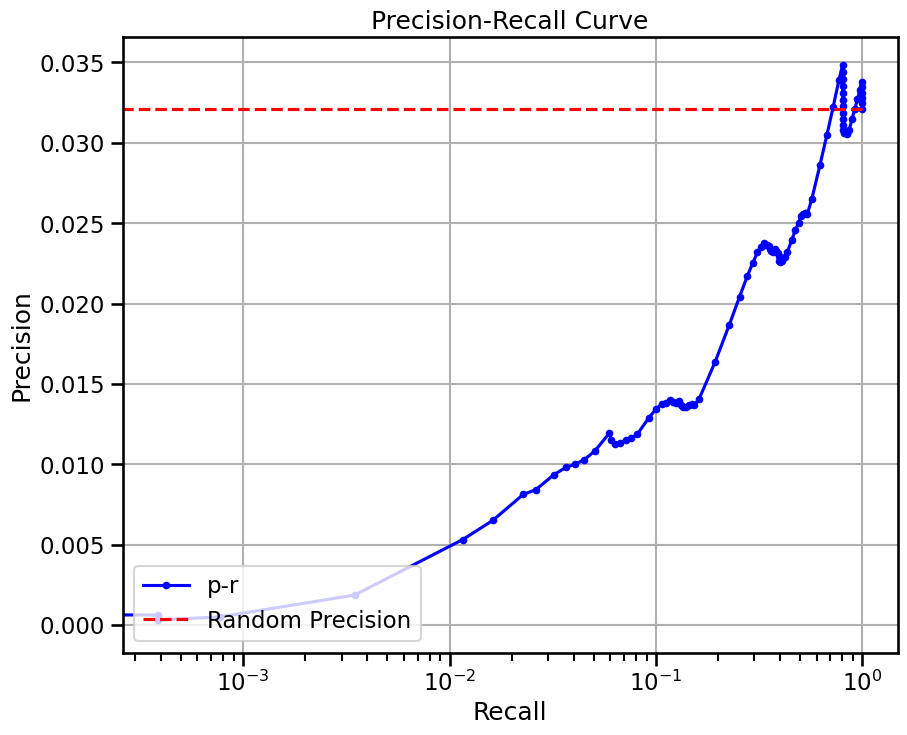

In [10]:
sc.pp.highly_variable_genes(
    adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
adata.var['ensembl_id'] = adata.var.index
subadata = adata[:MAXCELLS, adata.var.index.isin(
    genes) & adata.var.highly_variable]
subadata.var = subadata.var.set_index("symbol")
grn = generate_grn(model, vocab, subadata, batch_size = 10, num_attn_layers = 11)
grn.var.index.name=""
grn.var['symbol'] = grn.var.index
grn.varp['GRN'] = grn.varp['GRN'].T
metrics['scGPT_mine'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

In [11]:
metrics

{'scGPT_han': {'precision': 0.02740789449650209,
  'recall': 1.0,
  'rand_precision': 0.02741340251388483,
  'auprc': 0.021813575802196367,
  'epr': 0.38773864164747424},
 'scGPT_han_chip': {'precision': 0.2536840196611731,
  'recall': 1.0,
  'rand_precision': 0.2537350011763783,
  'auprc': 0.2443648512761225,
  'epr': 1.2505614440961927},
 'scGPT_han_ko': {'precision': 0.07659519504004134,
  'recall': 1.0,
  'rand_precision': 0.07661058796508957,
  'auprc': 0.06264502327552278,
  'epr': 0.20287663002542908},
 'scGPT_mine': {'precision': 0.03212866322475207,
  'recall': 1.0,
  'rand_precision': 0.03213622291021672,
  'auprc': 0.02439361650284492,
  'epr': 0.01122943106355988}}

In [12]:
res = []
res2 = []
for k, v in metrics.items():
    if k.split('_')[-1] == "base":
        res2.append([k.split('_')[-2], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])
    elif k.split('_')[-1] == "ko":
        res.append([k.split('_')[-2]+"_ko", v['epr'], v['auprc'], v['rand_precision'], 'tf_' in k])
    elif k.split('_')[-1] == "chip":
        res.append([k.split('_')[-2]+"_chip", v['epr'], v['auprc'], v['rand_precision'], 'tf_' in k])
    else:
        res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_only'])
df2 = pd.DataFrame(res2, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_only
0,han,0.387739,0.021814,0.027413,False
1,han_chip,1.250561,0.244365,0.253735,False
2,han_ko,0.202877,0.062645,0.076611,False
3,mine,0.011229,0.024394,0.032136,False


In [13]:
df2

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
